<a href="https://colab.research.google.com/github/hschettino/DS_Hemato/blob/main/GvHD_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Artigo


Gandelman JS, Byrne MT, Mistry AM, Polikowsky HG, Diggins KE, Chen H, Lee SJ, Arora M, Cutler C, Flowers M, Pidala J, Irish JM, Jagasia MH. Machine learning reveals chronic graft-versus-host disease phenotypes and stratifies survival after stem cell transplant for hematologic malignancies. Haematologica. 2019 Jan;104(1):189-196. doi: 10.3324/haematol.2018.193441. Epub 2018 Sep 20. PMID: 30237265; PMCID: PMC6312024.

link: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6312024/

dados: http://flowrepository.org/id/FR-FCM-ZYSU



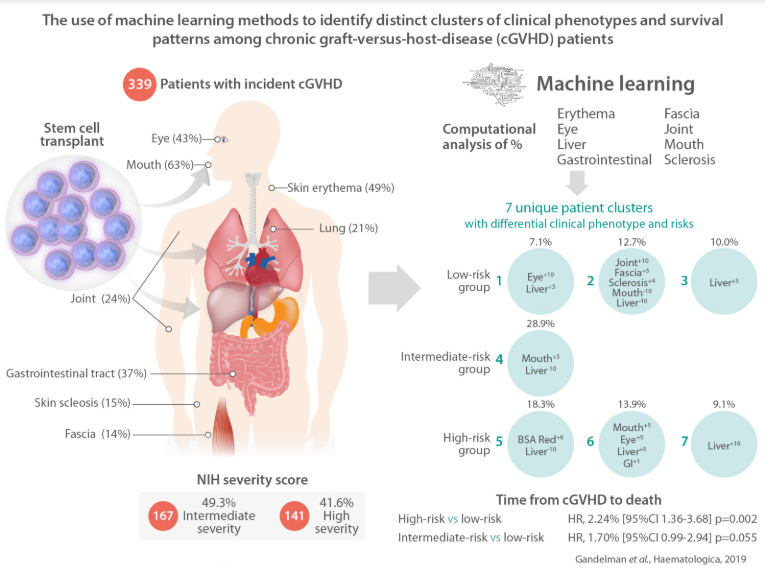

## Objetivo

* Explorar alguns conceitos de machine learning abordados no artigo.
  1. Clusterização
  2. Redução de dimensionalidade
  3. Análise de sobrevivência

* Reproduzir parte dos resultados

* Discutir as metodologias empregadas

## Leitura e exploração dos dados

In [1]:
# Importando as bibliotecas que serão uteis para a análise
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install lifelines

In [2]:
# Baixando os dados
url = "https://github.com/hschettino/DS_Hemato/raw/main/112018_cGVHD_Clustering_Data_FlowRepository.csv"
df = pd.read_csv(url)

In [3]:
df.head()

,Patient_ID,Mouth_Scaled (v)_(Mouth_Scaled),GI_Scaled (v)_(GI_Scaled),Eye_Scaled (v)_(Eye_Scaled),Joint_Scaled (v)_(Joint_Scaled),BSA_Scaled (v)_(BSA_Scaled),Scler_Scaled (v)_(Scler_Scaled),Fascia_Scaled (v)_(Fascia_Scaled),Liver_Scaled (v)_(Liver_Scaled),Mouth,...,Sclerosis.Score,Fascia.Score,Liver.Score,OSTime,OSStatus,SCT to GVHD (mos),Decision Tree Cluster,FlowSOMCluster,tSNE1,tSNE2
0,1,0.111111,0.111111,0.111111,0.0,0.000,0.0,0.0,0.000000,1,...,0,0,0,108.0,1,3.7,4,4,0.042177,16.633274
1,2,0.000000,0.000000,0.000000,0.0,0.602,0.0,0.0,0.000000,0,...,0,0,0,648.0,1,3.0,5,5,14.885974,-12.297521
2,3,0.444444,0.000000,0.000000,0.0,0.572,0.0,0.0,0.111111,2,...,0,0,1,2412.0,1,9.0,5,5,5.800097,-15.513273
3,4,0.111111,0.111111,0.000000,0.0,0.346,0.0,0.0,0.000000,1,...,0,0,0,391.0,0,16.1,5,5,13.194425,-6.108748
4,5,0.111111,0.111111,0.000000,0.0,0.000,0.0,0.0,0.444444,1,...,0,0,2,1092.0,0,11.6,3,3,-29.159472,-7.362180


In [4]:
df.shape

(339, 24)

In [5]:
df.columns

Index(['Patient_ID', 'Mouth_Scaled (v)_(Mouth_Scaled)',
       'GI_Scaled (v)_(GI_Scaled)', 'Eye_Scaled (v)_(Eye_Scaled)',
       'Joint_Scaled (v)_(Joint_Scaled)', 'BSA_Scaled (v)_(BSA_Scaled)',
       'Scler_Scaled (v)_(Scler_Scaled)', 'Fascia_Scaled (v)_(Fascia_Scaled)',
       'Liver_Scaled (v)_(Liver_Scaled)', 'Mouth', 'GI', 'Eye', 'Joint',
       'BSA Red', 'Sclerosis.Score', 'Fascia.Score', 'Liver.Score', 'OSTime',
       'OSStatus', 'SCT to GVHD (mos)', 'Decision Tree Cluster',
       'FlowSOMCluster', 'tSNE1', 'tSNE2'],
      dtype='object')

### Dicionário dos dados

Patient_ID: Patient ID for data sharing, unique for each patient

Mouth_Scaled: NIH 2005 Score for Mouth Scaled for Analysis

GI_Scaled: NIH 2005 Score for GI Scaled for Analysis

Eye_Scaled: NIH 2005 Score for Eye Scaled for Analysis

Joint_Scaled: NIH 2005 Score for Joint Scaled for Analysis

BSA_Scaled: Body Surface Area Skin Involvement from 0-100% Scaled for Analysis

Scler_Scaled: Hopkins Sclerosis Score from 0-4 Scaled for Analysis

Fascia_Scaled: Hopkins Fascia Score from 0-3 Scaled for Analysis

Liver_Scaled: NIH 2005 Score for Liver Scaled for Analysis

Mouth: NIH Mouth Score unscaled (0-3)

GI: NIH GI Score unscaled (0-3)

Eye: NIH Eye Score unscaled (0-3)

Joint: NIH Joint Score unscaled (0-3)

BSA Red: Body Surface Area Skin Involvement Unscaled from 0-100%

Sclerosis.Score: Hopkins Sclerosis Score unscaled (0-4)

Fascia.Score: Hopkins Fascia Score unscaled (0-3)

Liver.Score: NIH Liver Score unscaled (0-3)

OSTime: time in days from Study Entry to Last Visit OR Date of death

OSStatus: 1= deceased 0= alive

SCT to GVHD (mos): time from stem cell transplant to GVHD in months

Decision Tree: decision tree cluster assignment as presented in Figure 3

FlowSOMCluster: FlowSOM cluster assignment as presented in Figure 1 and 2

tSNE1: x-axis from viSNE analysis as presented in Figure 1

tSNE2: y-axis from viSNE as presented in Figure 1


## 1. Clusterização

Vamos inicialmente visualizar os próprios resultados do paper.

Cada linha de dado corresponde a variáveis ou "features" de um paciente.
8 features são usadas, que correspondem a uma escala do grau de comprometimento dos órgãos. Mouth, GI, Eye, Joint, BSA, Scler, Fascia, Liver

Assim, podemos dizer que cada caso é representado por um vetor de 8 dimensões.

In [6]:
# Fetures usadas na clusterização
colunas_originais = ['Mouth', 'GI', 'Eye',
                     'Joint','BSA Red', 'Sclerosis.Score',
                     'Fascia.Score', 'Liver.Score']
df[colunas_originais]

,Mouth,GI,Eye,Joint,BSA Red,Sclerosis.Score,Fascia.Score,Liver.Score
0,1,1,1,0,0.000000,0,0,0
1,0,0,0,0,60.200001,0,0,0
2,2,0,0,0,57.200005,0,0,1
3,1,1,0,0,34.599998,0,0,0
4,1,1,0,0,0.000000,0,0,2
...,...,...,...,...,...,...,...,...
334,1,1,0,0,0.000000,0,0,1
335,1,0,2,0,0.000000,0,0,1
336,1,1,0,0,0.000000,0,0,1
337,1,0,0,2,0.000000,0,0,0


Antes de realizar a clusterização, essas features são normalizadas para uma escala de 0 a 1. Essa prática é usada para melhorar a performance de certos algoritimos de clusterização, como o usado no artigo.

In [7]:
colunas_normalizadas = ['Mouth_Scaled (v)_(Mouth_Scaled)',
       'GI_Scaled (v)_(GI_Scaled)', 'Eye_Scaled (v)_(Eye_Scaled)',
       'Joint_Scaled (v)_(Joint_Scaled)', 'BSA_Scaled (v)_(BSA_Scaled)',
       'Scler_Scaled (v)_(Scler_Scaled)', 'Fascia_Scaled (v)_(Fascia_Scaled)',
       'Liver_Scaled (v)_(Liver_Scaled)']

df[colunas_normalizadas]

,Mouth_Scaled (v)_(Mouth_Scaled),GI_Scaled (v)_(GI_Scaled),Eye_Scaled (v)_(Eye_Scaled),Joint_Scaled (v)_(Joint_Scaled),BSA_Scaled (v)_(BSA_Scaled),Scler_Scaled (v)_(Scler_Scaled),Fascia_Scaled (v)_(Fascia_Scaled),Liver_Scaled (v)_(Liver_Scaled)
0,0.111111,0.111111,0.111111,0.000000,0.000,0.0,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.602,0.0,0.0,0.000000
2,0.444444,0.000000,0.000000,0.000000,0.572,0.0,0.0,0.111111
3,0.111111,0.111111,0.000000,0.000000,0.346,0.0,0.0,0.000000
4,0.111111,0.111111,0.000000,0.000000,0.000,0.0,0.0,0.444444
...,...,...,...,...,...,...,...,...
334,0.111111,0.111111,0.000000,0.000000,0.000,0.0,0.0,0.111111
335,0.111111,0.000000,0.444444,0.000000,0.000,0.0,0.0,0.111111
336,0.111111,0.111111,0.000000,0.000000,0.000,0.0,0.0,0.111111
337,0.111111,0.000000,0.000000,0.444444,0.000,0.0,0.0,0.000000


A ideia da clusterização é agrupar os dados de acordo com similaridade entre as features. Essa é uma técnica de aprendizado não supervisionado, uma vez que os dados não precisam de estar previamente rotulados.


O algoritimo de clusterização usado no paper é chamado de FlowSOM. É um algoritimo avançado e com grande robustez estatística desenvolvido inicialmente para identificar padrões de dados de citometria.
https://bioconductor.org/packages/release/bioc/html/FlowSOM.html


Após rodar o algoritimo, cada caso é categorisado em um cluster (1 a 7), de acordo com as características.


In [8]:
df[colunas_originais + ["FlowSOMCluster"] ]

,Mouth,GI,Eye,Joint,BSA Red,Sclerosis.Score,Fascia.Score,Liver.Score,FlowSOMCluster
0,1,1,1,0,0.000000,0,0,0,4
1,0,0,0,0,60.200001,0,0,0,5
2,2,0,0,0,57.200005,0,0,1,5
3,1,1,0,0,34.599998,0,0,0,5
4,1,1,0,0,0.000000,0,0,2,3
...,...,...,...,...,...,...,...,...,...
334,1,1,0,0,0.000000,0,0,1,4
335,1,0,2,0,0.000000,0,0,1,1
336,1,1,0,0,0.000000,0,0,1,4
337,1,0,0,2,0.000000,0,0,0,2


In [9]:
df['FlowSOMCluster'].value_counts()

FlowSOMCluster
4    98
5    62
6    47
2    43
3    34
7    31
1    24
Name: count, dtype: int64

Não existe uma pacote pronto para clusterização em python usando o método empregado no artigo FlowSOM. Entretanto, podemos simular uma clusterização usando um método bem mais simples e conhecido: K-Means.

O K-means tem 3 etapas:

1. Escolhe centroides do cluster aleatóriamente
2. Enquadra cada ponto no seu centroide mais próximo
3. Recalcula o centróide de cada cluster de acordo com os pontos
4. Repete passos 2 e 3 até que os clusters fiquem estáveis

Exemplo visual:
https://commons.wikimedia.org/wiki/File:K-means_convergence.gif



Para implementar o clusterização por KMeans, usamos o pacote scikit-learn.

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7,
                random_state=20,
                n_init="auto").fit(df[colunas_normalizadas])

df['K_means_cluster'] = kmeans.labels_

In [11]:
df[colunas_originais + ["K_means_cluster"] ].head(10)

,Mouth,GI,Eye,Joint,BSA Red,Sclerosis.Score,Fascia.Score,Liver.Score,K_means_cluster
0,1,1,1,0,0.000000,0,0,0,1
1,0,0,0,0,60.200001,0,0,0,0
2,2,0,0,0,57.200005,0,0,1,0
3,1,1,0,0,34.599998,0,0,0,0
4,1,1,0,0,0.000000,0,0,2,6
5,1,0,2,0,1.000000,0,0,0,2
6,1,3,0,0,40.000000,0,0,2,3
7,2,2,1,0,46.700001,0,0,1,0
8,0,0,0,0,2.250000,0,0,0,1
9,1,0,0,0,44.000000,0,0,1,0


In [12]:
df['K_means_cluster'].value_counts()

K_means_cluster
1    152
0     42
6     36
2     30
4     30
5     30
3     19
Name: count, dtype: int64

## 2. Redução de dimensionalidade

Esse conjunto de técnicas consiste em reduzir o número de dimensões do conjunto de dados e possui dois propósitos principais:

1.   Visualização de dados. Como nós só conseguimos visualizar gráficos em duas ou no máximo três dimensões, podemos usar essa técnica para simplificar os dados de uma forma que seja possível ver em um gráfico.

2.   Extrair componentes mais representativas dos dados, de forma que conseguimos representar a mesma complexidade usando menos dimensões.

No caso do artigo, o objetivo é a visualização. A ideia é reduzir as  8 dimensões do modelo para 2 dimensões. Existem diversas técnicas para realizar essa redução de dimensionalidade, as mais famosas são o TSNE e o PCA (Principal Components Analysis)

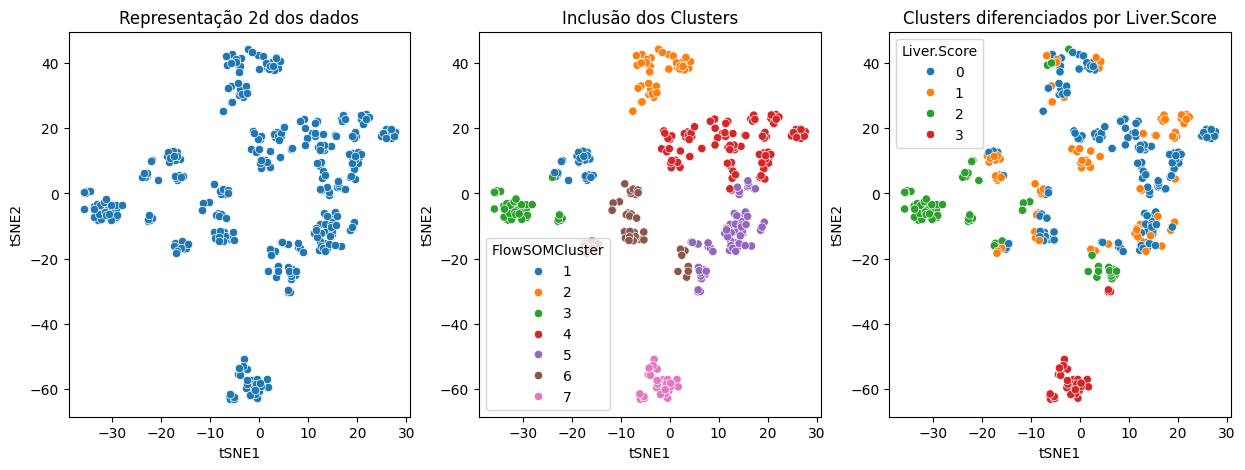

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

sns.scatterplot(data=df,
                x="tSNE1",
                y="tSNE2",
                ax=ax[0],
                )
ax[0].set_title('Representação 2d dos dados')

sns.scatterplot(data=df,
                x="tSNE1",
                y="tSNE2",
                hue="FlowSOMCluster",
                ax=ax[1],
                palette = "tab10",
                )
ax[1].set_title('Inclusão dos Clusters')

sns.scatterplot(data=df,
                x="tSNE1",
                y="tSNE2",
                hue="Liver.Score",
                ax=ax[2],
                palette = "tab10"
                )
ax[2].set_title('Clusters diferenciados por Liver.Score')


plt.show()

As duas dimensões criadas não são equivalentes a nenhuma das variáveis, não possuindo uma interpretação exata. Mas elas conseguem capturar a semelhança entre os dados.

Podemos refazer a redução de dimensionalidade usando o pacote scikit-learn e a função TSNE. Entretanto, como existem parâmetros que não foram disponibilizados no artigo, não é possível reproduzir de forma exata os resultados.

In [14]:
from sklearn.manifold import TSNE

X = np.array(df[colunas_normalizadas])

X_red = TSNE(n_components=2,
                    learning_rate='auto',
                    init='pca',
                    perplexity=20,
                    random_state = 42).fit_transform(X)

df['tSNE1_calc'] = X_red[:,0]
df['tSNE2_calc'] = X_red[:,1]

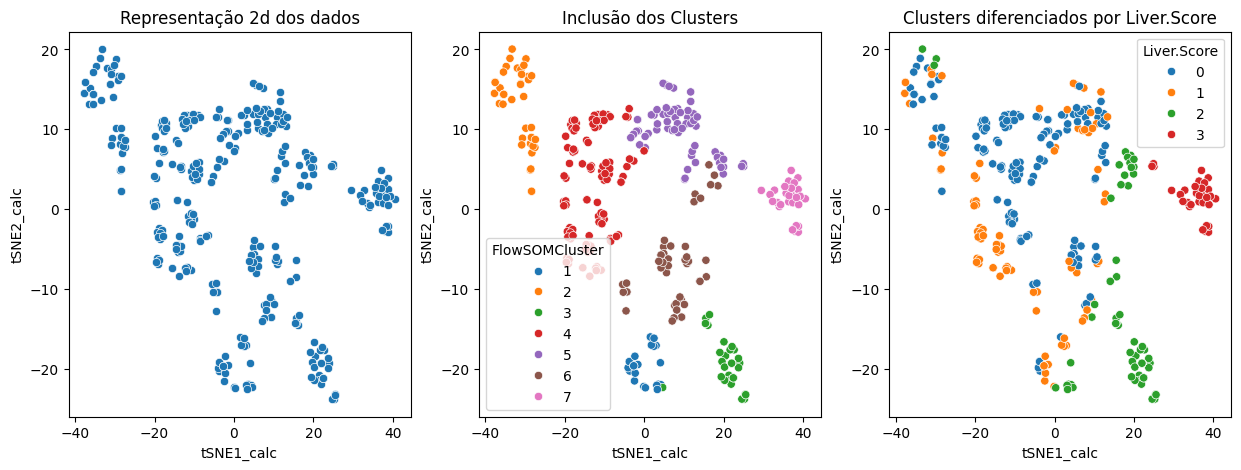

In [15]:
fig, ax = plt.subplots(1, 3, figsize = (15,5))

sns.scatterplot(data=df,
                x="tSNE1_calc",
                y="tSNE2_calc",
                ax=ax[0],
                )
ax[0].set_title('Representação 2d dos dados')

sns.scatterplot(data=df,
                x="tSNE1_calc",
                y="tSNE2_calc",
                hue="FlowSOMCluster",
                ax=ax[1],
                palette = "tab10",
                )
ax[1].set_title('Inclusão dos Clusters')

sns.scatterplot(data=df,
                x="tSNE1_calc",
                y="tSNE2_calc",
                hue="Liver.Score",
                ax=ax[2],
                palette = "tab10"
                )
ax[2].set_title('Clusters diferenciados por Liver.Score')


plt.show()

## 3. Análise de Sobrevivencia

A análise de sobrevivência é um ramo da estatística que possibilita analisar a duração esperada até que um ou mais eventos ocorram.

É usada para analisar as seguintes questões:

1. Proporção da população que sobrevive até um determinado momento
2. Taxa com que as mortes ocorrem
3. Entendimento do impacto das features sobrevivência

É muito usada em medicina para análises de tempo de sobrevida de pacientes, mas também é usada em economia, engenharias, etc.

Três modelos principais usados para análise de sobrevivência:

  * Kaplan-Maier Estimate
  * Cox Proportional Hazard Model
  * Accelerated Failure Time Model

https://medium.com/the-researchers-guide/survival-analysis-in-python-km-estimate-cox-ph-and-aft-model-5533843c5d5d

Esses modelos conseguem lidar com dados censurado, que são observações que são incompletas de uma maneira sistemática e conhecida. Um exemplo ocorre no estudo de causas de morte em uma amostra na qual alguns indivíduos ainda estão vivos ou que estavam vivos ao final do estudo.



In [16]:
# No caso do dataset em estudo
# O campo "OSStatus" indica se o paciente morreu (1) ou se está vivo (0)
# O campo OSTime indica o tempo desde o início do estudo até a última visita do paciente ou a morte

df[['OSStatus', 'OSTime']]

,OSStatus,OSTime
0,1,108.0
1,1,648.0
2,1,2412.0
3,0,391.0
4,0,1092.0
...,...,...
334,1,672.0
335,1,1098.0
336,0,546.0
337,1,673.0


Vamos plotar a curva de sobrevivência geral do estudo pelo método de Kaplan- Meier. A abordagem Kaplan-Meier é uma abordagem popular que reestima a probabilidade de sobrevivência cada vez que um evento ocorre. Para isso, usamos a biblioteca em python lifelines.

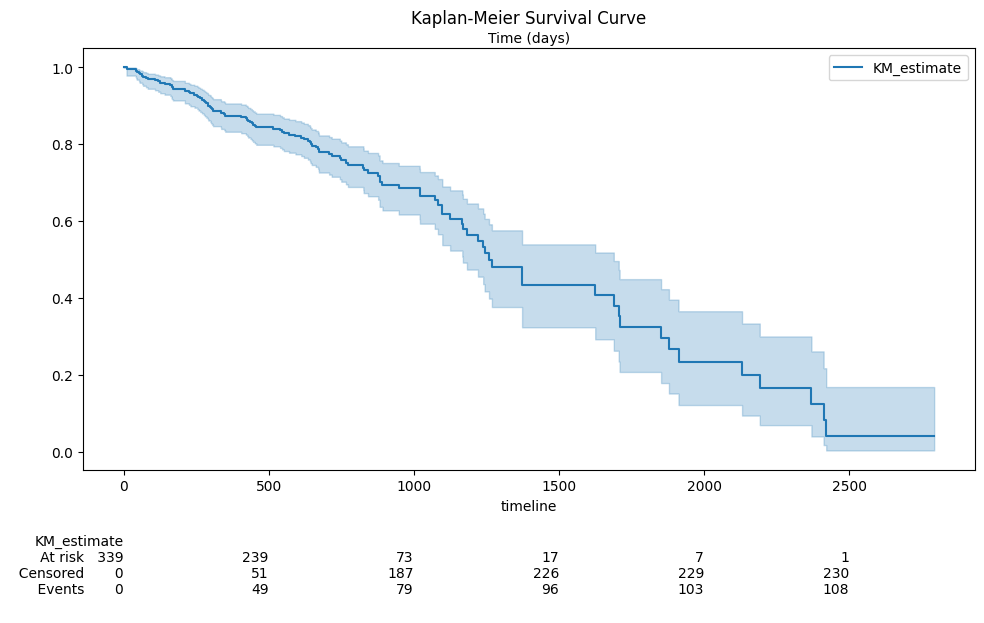

Median survival time: 1259.0 days


In [17]:
# prompt: Elaborar gráfico de análise de sobrevivencia para o dataset

import lifelines
from lifelines.plotting import plot_lifetimes

# Create a new dataframe with only the relevant columns
df_survival = df[['OSStatus', 'OSTime', 'FlowSOMCluster']]

# Create a lifelines Kaplan-Meier estimator object
kmf = lifelines.KaplanMeierFitter()

# Fit the Kaplan-Meier model to the data
kmf.fit(df_survival['OSTime'], event_observed=df_survival['OSStatus'])

# Plot the Kaplan-Meier curve
fig = plt.figure(figsize=(10, 6))
kmf.plot(at_risk_counts = True)
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')
plt.show()

# Calculate the median survival time
median_survival_time = kmf.median_survival_time_
print(f'Median survival time: {median_survival_time} days')


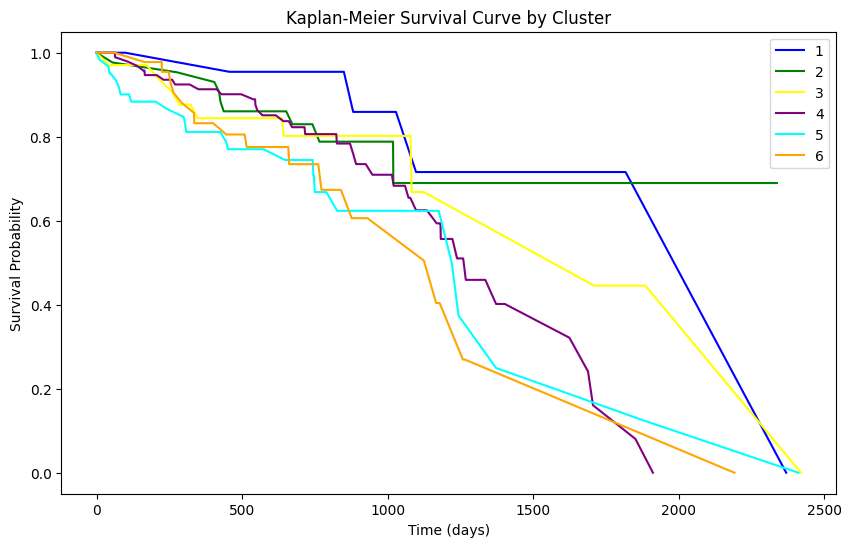

In [18]:
# Create a list of colors for the different clusters
colors = ["red", "blue", "green", "yellow", "purple", "cyan", "orange"]

# Create a new figure
fig = plt.figure(figsize=(10, 6))

# Loop through each cluster
for i in range(1,7):
  # Create a new dataframe for the current cluster
  df_cluster = df_survival[df_survival['FlowSOMCluster'] == i].reset_index(drop=True)

  # Create a new Kaplan-Meier estimator object
  kmf = lifelines.KaplanMeierFitter()

  # Fit the Kaplan-Meier model to the data
  kmf.fit(df_cluster['OSTime'], event_observed=df_cluster['OSStatus'])

  # Plot the Kaplan-Meier curve for the current cluster
  kmf.survival_function_.plot(ax=plt.gca(), color=colors[i])

# Set the title and labels
plt.title('Kaplan-Meier Survival Curve by Cluster')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')

# Show the plot

plt.legend(list(range(1,7)))
plt.show()


<ipython-input-19-a74e7baa541c>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_survival.loc[:, 'Risk Group'] = 'Low Risk'


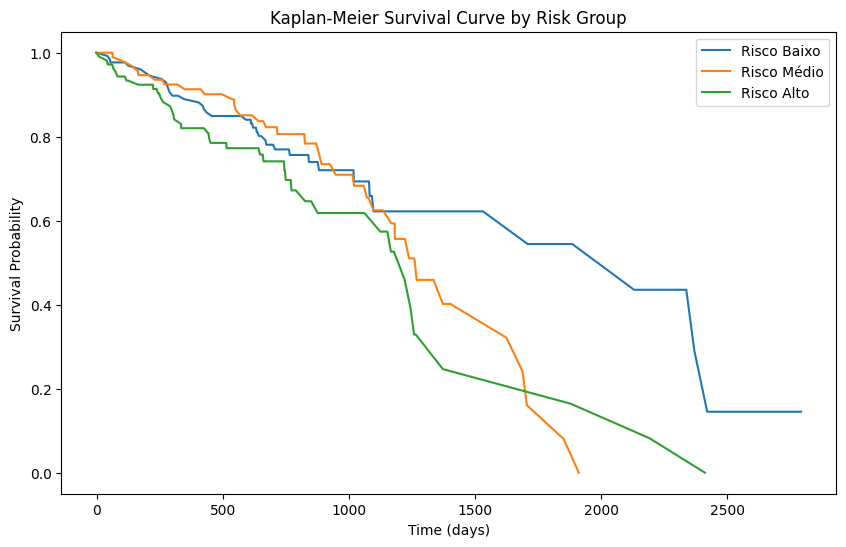

In [19]:
#Agrupando os clusters 1, 2 e 3 como risco baixo, cluster 4 como risco médio, e cluster 5 e 6 como risco alto

# Create a new dataframe with only the relevant columns
df_survival = df[['OSStatus', 'OSTime', 'FlowSOMCluster']]

# Create a new column that groups the clusters into low, medium, and high risk
df_survival.loc[:, 'Risk Group'] = 'Low Risk'
df_survival.loc[df_survival['FlowSOMCluster'] == 4, 'Risk Group'] = 'Medium Risk'
df_survival.loc[df_survival['FlowSOMCluster'].isin([5, 6]), 'Risk Group'] = 'High Risk'

# Create a new figure
fig = plt.figure(figsize=(10, 6))

for risk in ['Low Risk', 'Medium Risk', 'High Risk']:
  # Create a new dataframe for the current risk group
  df_risk = df_survival[df_survival['Risk Group'] == risk].reset_index(drop=True)

  # Create a new Kaplan-Meier estimator object
  kmf = lifelines.KaplanMeierFitter()

  # Fit the Kaplan-Meier model to the data
  kmf.fit(df_risk['OSTime'], event_observed=df_risk['OSStatus'])

  # Plot the Kaplan-Meier curve for the current risk group
  kmf.survival_function_.plot(ax=plt.gca(), label=risk)

# Set the title and labels
plt.title('Kaplan-Meier Survival Curve by Risk Group')
plt.xlabel('Time (days)')
plt.ylabel('Survival Probability')

plt.legend(['Risco Baixo', 'Risco Médio', 'Risco Alto'])
plt.show()

In [20]:
# Análise pelo modelo de Cox para cada cluster

from lifelines import CoxPHFitter

# Create a new dataframe with only the relevant columns
df_survival = df[['OSStatus', 'OSTime', 'FlowSOMCluster']]

# Create dummy variables from FlowSomCluster
df_survival = pd.get_dummies(df_survival, columns=['FlowSOMCluster'], drop_first=True)

# Create a Cox proportional hazards model
cph = CoxPHFitter()

# Fit the model to the data
cph.fit(df_survival, duration_col='OSTime', event_col='OSStatus')

# Print the coefficients of the model
print(cph.print_summary())

# Get the coefficients of the model
coefficients = cph.params_

# Create a dataframe of the coefficients
df_coefficients = pd.DataFrame({'Cluster': range(2, 8), 'Coefficient': coefficients})

# Print the dataframe of coefficients
print(df_coefficients.to_string())


<lifelines.CoxPHFitter: fitted with 339 total observations, 231 right-censored observations>
             duration col = 'OSTime'
                event col = 'OSStatus'
      baseline estimation = breslow
   number of observations = 339
number of events observed = 108
   partial log-likelihood = -510.15
         time fit was run = 2024-06-20 11:52:25 UTC

---
                   coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                
FlowSOMCluster_2   0.49       1.64       0.60            -0.69             1.68                 0.50                 5.34
FlowSOMCluster_3   0.63       1.87       0.60            -0.56             1.81                 0.57                 6.09
FlowSOMCluster_4   0.96       2.61       0.53            -0.08             2.00                 0.92                 7.40
FlowSOMCluster_5   1.21       3.36       0.54             0.14             2.28                 1.15                 9.77
FlowSOMCluster_6   1.22       3.39       0.56             0.12             2.32                 1.13                10.17
FlowSOMCluster_7   1.30       3.66       0.57             0.19             2.41                 1.20                11.09

                   cmp to    z    p   -log2(p)
covariate                                     
FlowSOMCluster_2     0.00 0.82 0.41       1.28
FlowSOMCluster_3     0.00 1.04 0.30       1.74
FlowSOMCluster_4     0.00 1.81 0.07       3.83
FlowSOMCluster_5     0.00 2.22 0.03       5.26
FlowSOMCluster_6     0.00 2.18 0.03       5.08
FlowSOMCluster_7     0.00 2.29 0.02       5.50
---
Concordance = 0.61
Partial AIC = 1032.30
log-likelihood ratio test = 12.29 on 6 df
-log2(p) of ll-ratio test = 4.16

None
                  Cluster  Coefficient
covariate                             
FlowSOMCluster_2        2     0.494651
FlowSOMCluster_3        3     0.625116
FlowSOMCluster_4        4     0.960532
FlowSOMCluster_5        5     1.211227
FlowSOMCluster_6        6     1.220276
FlowSOMCluster_7        7     1.296104


<Axes: xlabel='log(HR) (95% CI)'>

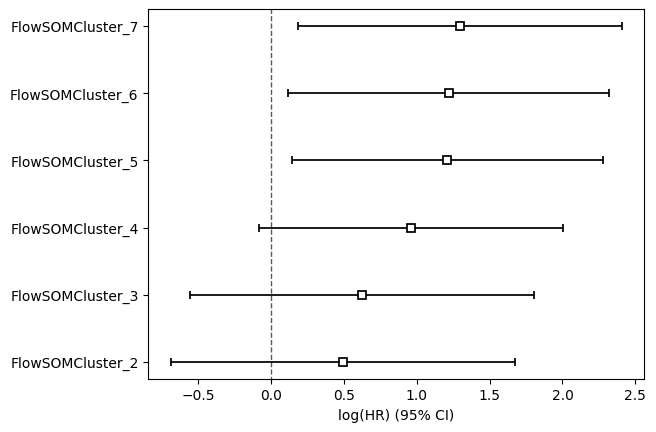

In [21]:
cph.plot()